In [49]:
%pip install pandas
%pip install matplotlib




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:

def read_csv_to_dataframe(file_path):
    """
    Liest eine CSV-Datei aus dem angegebenen relativen Pfad ein und gibt einen Pandas DataFrame zurück.
    
    :param file_path: Der relative Pfad zur CSV-Datei.
    :return: Ein Pandas DataFrame mit den Daten aus der CSV-Datei.
    """
    try:
        # Verwende Pandas, um die CSV-Datei in einen DataFrame zu lesen
        dataframe = pd.read_csv(file_path)
        
        # Gib den erstellten DataFrame zurück
        return dataframe
    except FileNotFoundError:
        print(f"Die Datei unter dem Pfad '{file_path}' wurde nicht gefunden.")
        return None
    except Exception as e:
        print(f"Fehler beim Lesen der CSV-Datei: {str(e)}")
        return None

relative_path = "../Ergebnisse/evaluation_iteration1_quantitativ.csv"
df = read_csv_to_dataframe(relative_path)

if df is not None:
    print(data_frame.head())

  PROBAND_CODE                    ENTWURF  FRAGE_CODE ITEM_CODE  \
0         P_01  FARBCODIERUNG_MIT_LEGENDE  F_SKALA_01   ITEM_01   
1         P_01  FARBCODIERUNG_MIT_LEGENDE  F_SKALA_02   ITEM_02   
2         P_01  FARBCODIERUNG_MIT_LEGENDE  F_SKALA_03   ITEM_03   
3         P_01  FARBCODIERUNG_MIT_LEGENDE  F_SKALA_04   ITEM_04   
4         P_01  FARBCODIERUNG_MIT_LEGENDE  F_SKALA_05   ITEM_05   

                                          FRAGE_TEXT ITEM_REFERENZ  \
0  Die Darstellung von konkreten Aufrufbeziehunge...   Darstellung   
1  Die Anwendung der Farbcodierung mit Legende zu...     Anwendung   
2  Die Darstellung von konkreten Aufrufbeziehunge...   Darstellung   
3  Die Darstellung von konkreten Aufrufbeziehunge...   Darstellung   
4  Das Gesamtbild erscheint mir durch die Farbcod...    Gesamtbild   

           ITEM_NEG          ITEM_POS          DIMENSION  RESULTAT  
0    unverständlich      verständlich  DURCHSCHAUBARKEIT         3  
1  schwer zu lernen  leicht zu lernen 

Statistische Werte für jede Klasse:
Modus:
{'ANIMATION': 5, 'FARBCODIERUNG_MIT_LEGENDE': 5, 'PFEILSYSTEM': 5}
Minimum:
{'ANIMATION': 1, 'FARBCODIERUNG_MIT_LEGENDE': 1, 'PFEILSYSTEM': 1}
Maximum:
{'ANIMATION': 7, 'FARBCODIERUNG_MIT_LEGENDE': 7, 'PFEILSYSTEM': 7}


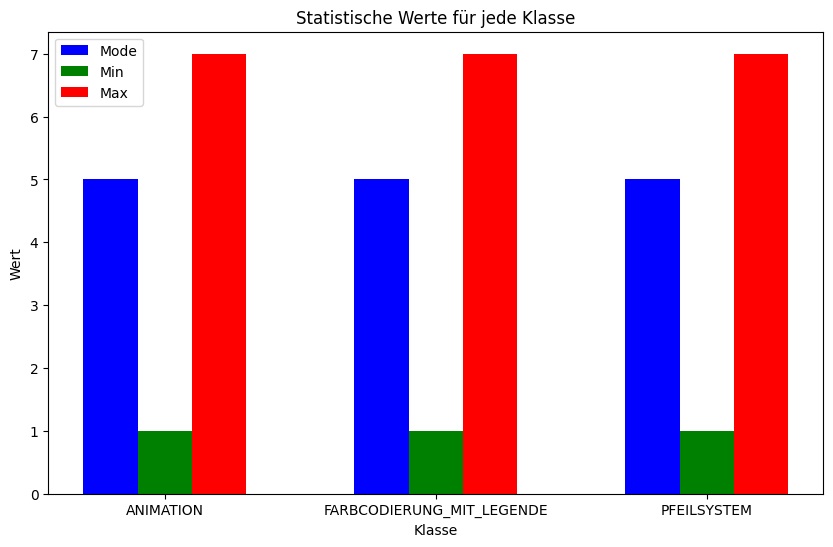

In [52]:

def calculate_stats(data_frame):
    """
    Berechnet den Modus, das Minimum und das Maximum der Spalte 'RESULTAT' für jede Klasse in der Spalte 'ENTWURF'.

    :param data_frame: Ein Pandas DataFrame mit den Daten.
    :return: Ein Dictionary, das die statistischen Werte für jede Klasse enthält.
    """
    try:
        # Gruppiere den DataFrame nach der Spalte 'ENTWURF'
        grouped_by_entwurf = data_frame.groupby('ENTWURF')['RESULTAT']
        
        # Berechne den Modus, das Minimum und das Maximum für jede Klasse
        stats = grouped_by_entwurf.agg([('mode', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
                                        ('min', 'min'),
                                        ('max', 'max')])
        
        # Gib die Ergebnisse als Dictionary zurück
        result_dict = {
            'mode': dict(zip(stats.index, stats['mode'])),
            'min': dict(zip(stats.index, stats['min'])),
            'max': dict(zip(stats.index, stats['max']))
        }
        return result_dict
    except Exception as e:
        print(f"Fehler bei der Berechnung der statistischen Werte: {str(e)}")
        return None

def plot_stats(stats_result):
    """
    Erstellt ein Diagramm für die statistischen Werte.

    :param stats_result: Das Dictionary mit den statistischen Werten.
    """
    try:
        # Extrahiere Klassen und Werte aus dem Ergebnis
        classes = list(stats_result['mode'].keys())
        modes = list(stats_result['mode'].values())
        mins = list(stats_result['min'].values())
        maxs = list(stats_result['max'].values())

        # Erstelle ein Balkendiagramm
        bar_width = 0.2
        bar_positions_mode = range(len(classes))
        bar_positions_min = [pos + bar_width for pos in bar_positions_mode]
        bar_positions_max = [pos + bar_width for pos in bar_positions_min]

        plt.figure(figsize=(10, 6))
        plt.bar(bar_positions_mode, modes, color='blue', width=bar_width, label='Mode')
        plt.bar(bar_positions_min, mins, color='green', width=bar_width, label='Min')
        plt.bar(bar_positions_max, maxs, color='red', width=bar_width, label='Max')

        # Füge Beschriftungen und Legende hinzu
        plt.xlabel('Klasse')
        plt.ylabel('Wert')
        plt.title('Statistische Werte für jede Klasse')
        plt.xticks(bar_positions_min, classes)
        plt.legend()

        # Zeige das Diagramm an
        plt.show()
    except Exception as e:
        print(f"Fehler bei der Erstellung des Diagramms: {str(e)}")

stats_result = calculate_stats(df)

if stats_result is not None:
    print("Statistische Werte für jede Klasse:")
    print("Modus:")
    print(stats_result['mode'])
    print("Minimum:")
    print(stats_result['min'])
    print("Maximum:")
    print(stats_result['max'])

    # Erstelle das Diagramm
    plot_stats(stats_result)
